In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
url = 'https://archive.ics.uci.edu/ml/datasets/Spambase'

data = pd.read_csv("spambase.data")
X = data.drop('1', axis=1) #'1' is the target feature
Y = data['1']

<AxesSubplot:xlabel='1', ylabel='count'>

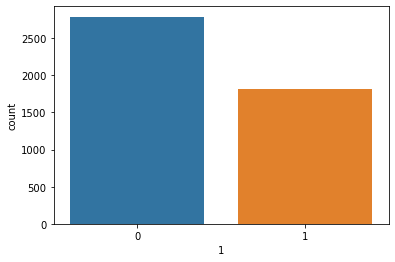

In [3]:
sns.countplot(x=data['1']) #visualie the amount in each class

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print("train: ", X_train.shape, Y_train.shape)
print("test: ", X_test.shape, Y_test.shape)

train:  (3220, 57) (3220,)
test:  (1380, 57) (1380,)


In [7]:
sc = StandardScaler() #To standardize the data
sc.fit(X_train)
X_train = pd.DataFrame(sc.transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [9]:
C = 10 #I tested different values of C (10^-2, 10^-1 ... 10^4)

clf = SVC(kernel = 'linear', C=C) #I tested various kernel functions (linear, quadratic, RBF)  
clf.fit(X_train, Y_train)

print('Train acc {acc: .4f}'.format(acc = clf.score(X_train, Y_train)))
print('Test acc {acc: .4f}'.format(acc = clf.score(X_test, Y_test)))

Train acc  0.9388
Test acc  0.9268


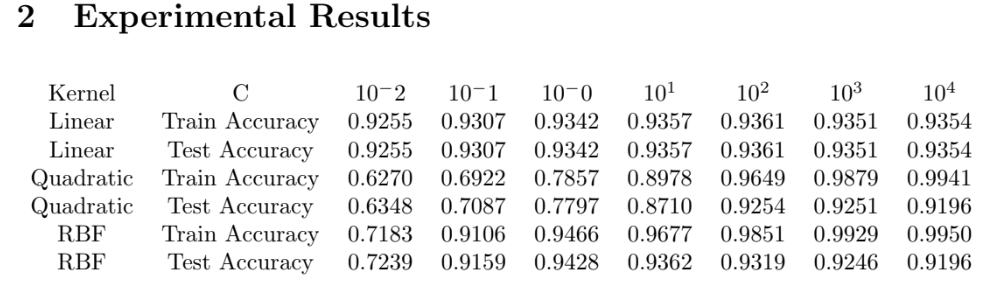

For all three kernel functions, the training accuracy of the model increases as the C value increases. This is because C represents the penalties given to misclassified values, based on how big the mistakes are, as it is multiplied by the sum of the slack variables (error values). Basically, it is a parameter to control the importance of the error values, which are not classified correctly by the model. If the C value is very large, the model will accept only a few mistakes because the large C value increases the magnitude of each mistake. This will cause the model to choose a smaller margin hyperplane to separate the data. A smaller C value would diminish the significance of any errors which would lead to more inaccuracies as there is more tolerance for mistakes, and will use a larger margin hyperplane. However, a downside to increasing the value of C is that it takes much longer to run, especially for the linear kernel. Not only that, it leads to overfitting to the training data because the model tries too hard to reduce errors in the training phase due to the larger C value which magnifies the total errors. This idea is demonstrated in the results by the fact that the test accuracy starts to decrease as C becomes greater than 10 (as C ≥ 100 for quadratic kernel), while the train accuracy still increases. It is important to find the correct balance of the emphasis placed on errors, controlled by the C value. The best set of parameters for this model according to the data that I used were
C = 1, with the RBF kernel function, since the test accuracy was highest at that point. The RBF function defines projections into an infinite dimensional space essentially forcing it to be linearly separable. This is why the RBF kernel function is the most commonly used in SVM, because it works with any type of data. It is interesting that the linear function has a high accuracy as well and the RBF function is not much better, if at all. In fact, the linear kernel does much better than the other two for low values of C, and does not seem to be heavily affected by varying the C value. The reason for this is that the
data already had a large number of features, so the projecting and mapping into infinite dimensions, as done by the RBF function, does not significantly improve the accuracy of the model, compared to the effect that it would have if there were less dimensions to begin with. Thus, the linear kernel maintains a high accuracy regardless of the C value, because there were not many errors due to how many dimensions there were in the original dataset even with smaller values of C. It is also worth adding that for all values of C, the train and test accuracy were extremely similar indicating that there was no overfitting involved, while for the other two kernel functions, the test accuracy started to decrease as the train accuracy continues to increase, for certain values of C. This is because the linear function was able to classify the data very cleanly. On the other hand, the tests using the quadratic kernel had the lowest accuracy for small C values (C ≤ 1) and only performed about as well as the other functions for C values greater than or equal to 100. This may indicate that there are many more errors when using the Quadratic function compared to the other two, which is why a higher C value is required to achieve a relatively high test accuracy. The quadratic kernel also leads to overfitting for larger values of C, similar to the RBF function.